In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv("C:\\Users\\olufu\\Downloads\\datasetfromkaggle\\creditcard_2023.csv")

link to dataset used in this project

https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/

Key features in dataset

id: Unique identifier for each transaction
    
V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc. hidden for security reasons)
    
Amount: The transaction amount
    
Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [3]:
data.count()   # checks the confirm for uniformity in varaible counts, from below we can see our dataset has a uniform count

id        568630
V1        568630
V2        568630
V3        568630
V4        568630
V5        568630
V6        568630
V7        568630
V8        568630
V9        568630
V10       568630
V11       568630
V12       568630
V13       568630
V14       568630
V15       568630
V16       568630
V17       568630
V18       568630
V19       568630
V20       568630
V21       568630
V22       568630
V23       568630
V24       568630
V25       568630
V26       568630
V27       568630
V28       568630
Amount    568630
Class     568630
dtype: int64

In [4]:
data.shape     # shows data dimension - means there are 568630 rows and 31 columns

(568630, 31)

In [5]:
data.describe()   # shows statistics of data, a good understanding of basic statistics is needed to interprete this figures

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [6]:
data.head()    #prints the first 5 rows in the dataset

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


<Axes: xlabel='Class'>

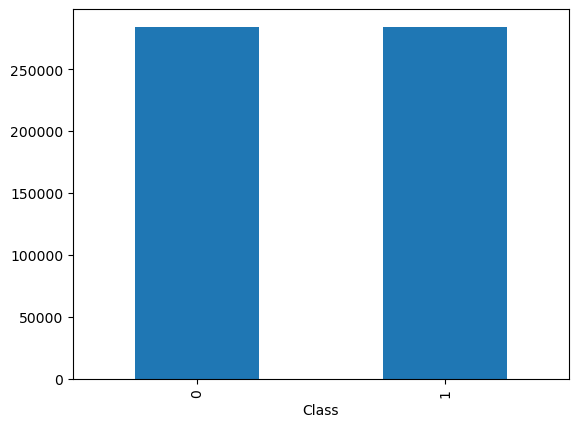

In [7]:
# checking for class imbalance, a balanced class is needed for any machine learning project, in this project 'Class' is the credit card fraud we want to predict
data['Class'].value_counts().plot(kind='bar')

In [8]:
import numpy as np

# replacing outliers in each column with mean of each column
def replace_outliers_with_mean(column):
    mean = column.mean()
    std = column.std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    column[column < lower_bound] = mean
    column[column > upper_bound] = mean
    return column

# Apply the function to each numeric column in the DataFrame
numeric_columns = data.select_dtypes(include=[np.number])
data[numeric_columns.columns] = numeric_columns.apply(replace_outliers_with_mean)

from above , we can see that our dataset is balanced, balanced dataset is crucial for any machine learning algorithm for optimum performance, if class is not balanced, any machine learning algorithm would be bias towards the class with the highest number. Look up methods to fix class imbalance incase your dataset is not balanced

In [9]:
y=data['Class']  # our target is the variable we want to predict.
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [10]:
X=data.drop('Class', axis=1) # these are the independent variables

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [13]:
# Initialize the logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)  # Increase max_iter to avoid convergence warning

# Define hyperparameters to tune
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear']}


In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# Use GridSearchCV with StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(logistic_regression, param_grid, cv=cv, error_score='raise', scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise', estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [15]:
# Get the best hyperparameters, tuning hyperparameter is very important 
best_params = grid_search.best_params_

In [16]:
best_params

{'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}

In [17]:
# Train the model with the best hyperparameters
best_model = LogisticRegression(**best_params, max_iter=1000)
best_model.fit(X_train, y_train)

LogisticRegression(C=0.001, max_iter=1000, solver='liblinear')

In [18]:
# Make predictions on the testing data
predictions = best_model.predict(X_test)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

In [20]:
# Print the results
print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy}')
print('Classification Report:\n', report)

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.7893445650071224
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.66      0.76     56750
           1       0.73      0.92      0.81     56976

    accuracy                           0.79    113726
   macro avg       0.81      0.79      0.79    113726
weighted avg       0.81      0.79      0.79    113726



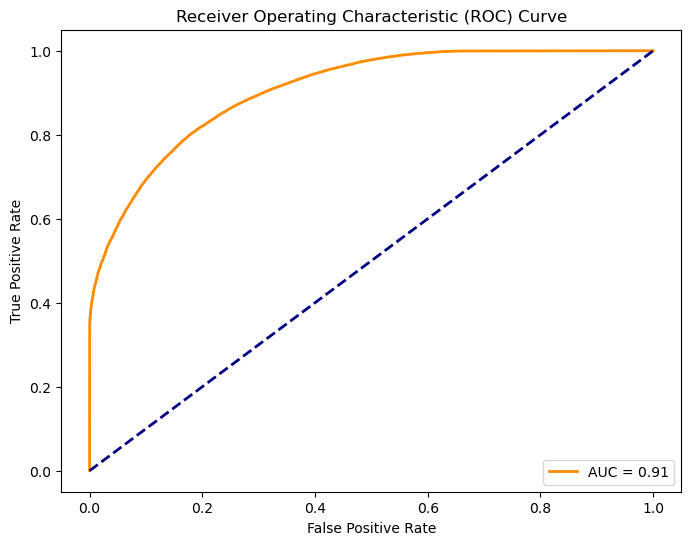

AUC: 0.91


In [21]:
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f'AUC: {roc_auc:.2f}')

from above, we can see our logistic regression model gave results below:
    
f1-score: 0.76, 0.81 

AUC: 0.91
    
Accuracy: 0.78, well this is credit card fraud detection, we would be going for a model with higher accuracy, so lets try one more mdel to see


Below we would be using svm for our classification to compare model, for probelm like credit card fraud detection we want a very high accuracy

In [ ]:
!conda update conda

In [ ]:
!conda update anaconda

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
# Define the SVM model
svm_model = svm.SVC()

# Define the hyperparameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

In [ ]:
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

In [ ]:
# Print the best hyperparameters found by grid search
print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
# Get the best model from the grid search
best_svm_model = grid_search.best_estimator_

In [ ]:
# Evaluate the model on the test set
y_pred = best_svm_model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix


confusion = confusion_matrix(y_test, y_pred)

# create a dataframe for the confusion matrix
confusion_df = pd.DataFrame(confusion, index=['0', '1'], columns=['0', '1'])
print(confusion_df)

In [ ]:
import seaborn as sns


axes = sns.heatmap(confusion_df, annot=True, cmap="Blues_r")

In [ ]:
from sklearn.metrics import classification_report, roc_curve, auc
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
import matplotlib.pyplot as plt

# Plot AUC/ROC curve
y_score = best_svm_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

SVM takes sometime to run depending on the processing power of your PC and the number of iterations, for this dataset there are 

568630 rows, The 2 models were compared and the model with the hight accuracy is selected. This project summarized end to end Machine 

Learning classification Project.